In [1]:
import numpy as np
import pandas as pd
from numpy.matlib import repmat
import matplotlib.pyplot as plt
# from scipy.stats import multivariate_normal
from numpy.linalg import norm

In [2]:
def create_y(x,w):
	return(w[0]*pow(x,3) + w[1]*pow(x,2) + w[2]*x + w[3])

In [3]:
def l2_square(wt,wm):
	a = pow(wt[0,0] - wm[0,0],2)
	b = pow(wt[1,0] - wm[1,0],2)
	c = pow(wt[2,0] - wm[2,0],2)
	d = pow(wt[3,0] - wm[3,0],2)
	l2err = a+b+c+d
	return(l2err)

In [8]:
def create_dataset():
	x = np.random.uniform(-1,1,10).reshape((10,1))
	noise = np.random.normal(0,0.1,10).reshape((10,1))
	z = np.c_[pow(x,3),pow(x,2),pow(x,1),pow(x,0)].T
	Z = np.zeros((4,4,10))
	for i in range(10):
		Z[:,:,i] = z[:,i].reshape((4,1))*z[:,i].reshape((4,1)).T
	y = create_y(x,w_true) + noise
	return(y,Z,z)

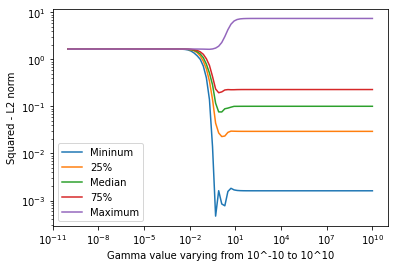

In [9]:
# np.random.seed(1)
# noise = np.random.normal(0,0.1,10).reshape((10,1))
# w_true = np.random.multivariate_normal(np.zeros((4)),0.01 *np.identity(4),1).T
w_true = np.array(([1, -0.8,-0.15,0.035])).reshape((4,1))
# x = np.random.uniform(-1,1,10).reshape((10,1))

gamma_list = []
for i in np.logspace(-10,10,100):
	gamma_list.append(i)

l2_summary = np.zeros((100,len(gamma_list)))
stats_l2 = np.zeros((5,len(gamma_list)))
# L2 = []
for i in range(100):
	L2 = []
	y,Z,z = create_dataset()
	for gamma in gamma_list:
		w_map = np.dot(np.linalg.inv(np.sum(Z,axis=2) + (0.01/pow(gamma,2) *np.identity(4))),np.sum((repmat(y.T,4,1) * z),axis=1)).reshape((4,1))
		L2.append(pow(norm(w_true-w_map),2))

	l2_summary[i,:] = L2

for j in range(len(gamma_list)):
	stats_l2[:,j] = [np.min(l2_summary[:,j]),np.percentile(l2_summary[:,j],25),np.percentile(l2_summary[:,j],50),np.percentile(l2_summary[:,j],75),np.max(l2_summary[:,j])]


# In[717]:
plt.plot(gamma_list,stats_l2[0,:],label = 'Mininum')
plt.plot(gamma_list,stats_l2[1,:],label = '25%')
plt.plot(gamma_list,stats_l2[2,:],label = 'Median')
plt.plot(gamma_list,stats_l2[3,:],label = '75%')
plt.plot(gamma_list,stats_l2[4,:],label = 'Maximum')
plt.legend()
plt.xlabel('Gamma value varying from 10^-10 to 10^10')
plt.ylabel('Squared - L2 norm')
plt.yscale(value = 'log')
plt.xscale(value = 'log')
plt.rcParams['figure.figsize'] = [10,6]
plt.show()
